# Predicting Car Prices

This is a guided project from Dataquest with several additional analysis conducted by myself. We will build up the machine learning workflow (k-nearest neighbors algorithm) to predict a car's market price. 
* Data cleaning and explore the correlation between the features we input to train the model and the `price`. 
* Build up a simple univariate model 
* Build up a simple multivariate model
* Optimizing the model - test different combination of input features with different k-neighbor values. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Let's look at the raw data first, we read in the data using `pd.read_csv`. 

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highwat_mpg', 'price']
cars = pd.read_csv("imports-85.data", names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highwat_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## DATA CLEANING

* We are only interested in numerical variables so we select only the columns with continuous values.
* We will investigate each variable and convert those missing data point into "Nan". Those Nan point will be filled by the mean value of that colume. 
* A normalization will be applied to all remaining columes. 

In [3]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highwat_mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highwat_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highwat_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


* Convert all the value to 'float' type and summerize the number of missing value of all columes. 

In [5]:
numeric_cars = numeric_cars.astype('float')
print("Index                Count")
numeric_cars.isnull().sum()

Index                Count


normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highwat_mpg           0
price                 4
dtype: int64

* `price` is the column we want to predict, we will remove any rows with missing `price` values.

In [7]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highwat_mpg           0
price                 0
dtype: int64

* Replace missing values in other columns using column means and confirm that there is no more missing values. 

In [8]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highwat_mpg          0
price                0
dtype: int64

* Normalizing all columes using minmax scaling except the `price` column. We also plot the histogram of the price to understand the distribution of our target. 

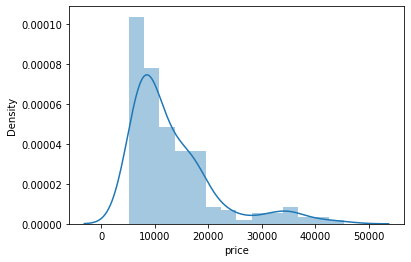

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highwat_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [76]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col
sns.distplot(numeric_cars['price'])
plt.show()
numeric_cars.head()


## Univariate Model
Univariate models are models in which a single variable is used to predict a target variable. We are interested in exploring whether a K-Nearest Neighbor Regressor might be a suitable model to help predict the price of cars in the dataset 

### step 1.
We will start with a simple univariate model with 2 folds of the dataset and using a default k (k=5) value to get some sense of the model. Every components in our data will be applied to the model and the root mean square misfit will be performed. 

In [108]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_value = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_value)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()


engine-size          3217.672060
pred_eng_price       3303.300155
horsepower           4036.641365
pred_hor_price       4280.141144
curb-weight          4390.831218
city-mpg             4653.541841
width                4783.853203
highwat_mpg          5095.824417
length               5404.456623
wheel-base           5515.846253
compression-rate     6186.852046
bore                 7070.262409
peak-rpm             7228.221929
normalized-losses    7625.473583
height               7846.702838
stroke               8152.429509
dtype: float64

### Step 2. 
In this step, we are going to implement k-fold cross validation instead of test/train validation (classic 50% holdout).

* We define a new function `knn_train_test_kfold` which will accept number of folds and number of k neigbors.
* Calculate the cross validation score (RMSE) and predict value using the two routines `cross_val_score` and `cross_val_predict`. 

In [114]:
def knn_train_test_kfold(train_col, target_col, df=numeric_cars, neighbors = 5, folds = 5, w = 'uniform'):
    
    x = df[train_col]
    y = df[target_col]
    
    #instantiate a number of folds for cross validation 
    kf = KFold(n_splits = folds, shuffle = True, random_state = 0)
    
    # Instantiate a KNN model using a k-neighbors value.
    knn = KNeighborsRegressor(n_neighbors = neighbors, weights = w)
    
    #Perform cross validation with the cross_val routine (that under the hood fits the model and predicts values)
    rmses = cross_val_score(knn, x, y, scoring = 'neg_root_mean_squared_error', cv = kf)
    r2 = cross_val_score(knn, x, y, scoring = 'r2', cv = kf)
    
    # cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validation
    predicted_labels = cross_val_predict(knn, x, y, cv = kf)
    
    result = {}
    result['rmse'] = abs(rmses)        #array of rmses equal to the number of folds
    result['r2'] = abs(r2)             #array of r_squared equal to the number of folds
    result['pred'] = predicted_labels

    return result

train_cols = numeric_cars.columns.drop('price')

results = knn_train_test_kfold(train_col=['horsepower'], target_col='price', df=numeric_cars, neighbors=5, folds=5)
numeric_cars['pred_hor_price']=results['pred']
print('horsepower\n')   
for key in ['rmse', 'r2']:
    print(f'{key.upper()} calculated per fold: {results[key].round(2)}')
    print('Average', key, ':', results[key].mean().round(2), '\n')

    
results = knn_train_test_kfold(train_col=['engine-size'], target_col='price', df=numeric_cars, neighbors=5, folds=5)
numeric_cars['pred_eng_price']=results['pred']
print('engine-size\n')   
for key in ['rmse', 'r2']:
    print(f'{key.upper()} calculated per fold: {results[key].round(2)}')
    print('Average', key, ':', results[key].mean().round(2), '\n')

horsepower

RMSE calculated per fold: [2857.47 3501.6  3459.92 4969.5  4074.95]
Average rmse : 3772.69 

R2 calculated per fold: [0.89 0.83 0.83 0.38 0.66]
Average r2 : 0.72 

engine-size

RMSE calculated per fold: [2650.51 3450.63 3211.71 3087.17 3325.32]
Average rmse : 3145.07 

R2 calculated per fold: [0.91 0.84 0.86 0.76 0.77]
Average r2 : 0.83 



In [80]:
k_neighbors = [1,3,5,7,9]
labels = '1_neighbor 3_neighbor 5_neighbor 7_neighbor 9_neighbor'.split()
train_cols = numeric_cars.columns.drop('price')

errors = [
    [round(knn_train_test_kfold(train_col = [f], target_col = 'price', df = numeric_cars, neighbors = k, folds = 5)['rmse'].mean(),2) 
     for f in train_cols]
    for k in k_neighbors 
]
data = pd.DataFrame(data = errors, columns = train_cols, index = labels)
data


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highwat_mpg
1_neighbor,7189.85,4317.10,4653.89,4965.21,9957.53,5593.36,3619.58,7994.51,8614.86,7173.17,3863.83,7748.34,4640.91,5308.80
3_neighbor,6982.84,5729.18,5026.50,4202.60,8473.50,4486.33,3122.01,7394.89,7493.15,6531.65,3653.98,7977.61,4218.26,4312.27
5_neighbor,6804.74,6218.34,5385.18,4531.21,7742.51,4185.70,3145.07,6644.57,7219.40,7021.62,3772.69,7730.96,4416.30,4309.65
7_neighbor,7205.24,5920.93,5467.23,4549.49,7675.39,4054.50,3471.88,6712.37,7338.80,6770.13,3823.33,7942.27,4354.06,4092.25
9_neighbor,7446.82,5857.40,5522.50,4633.43,7589.42,4048.28,3439.67,6823.76,7388.11,6584.92,4107.58,7954.75,4322.17,4261.23


Compute average RMSE across different `k` values for each feature.

<AxesSubplot:>

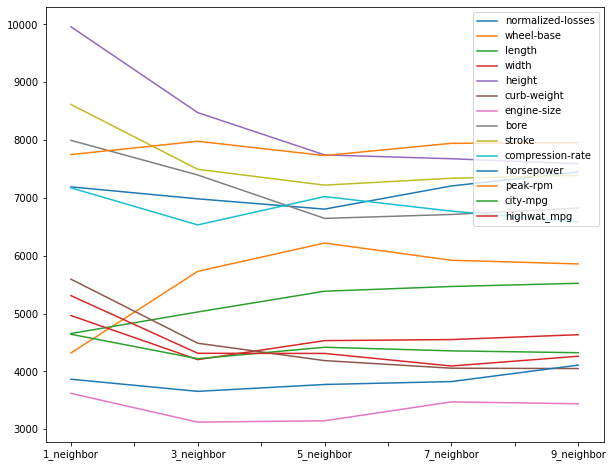

In [83]:
data.plot(figsize=(10,8))

From the plot, we can observe that the feature `engine-size` has a lowest misfit. 

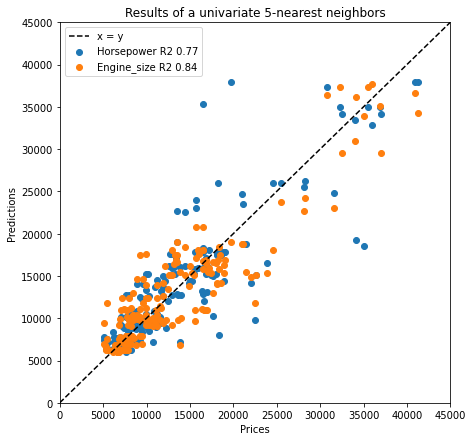

In [109]:
r2_hp = round(r2_score(numeric_cars['price'], numeric_cars['pred_hor_price']),2)
r2_es = round(r2_score(numeric_cars['price'], numeric_cars['pred_eng_price']),2)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.plot([0,45000],[0,45000], linestyle='--', color='k')
ax.scatter(y = numeric_cars['pred_hor_price'], x = numeric_cars['price'])
ax.scatter(y = numeric_cars['pred_eng_price'], x = numeric_cars['price'])
ax.legend(['x = y', f'Horsepower R2 {r2_hp}', f'Engine_size R2 {r2_es}'])
ax.set_xlabel('Prices')
ax.set_ylabel('Predictions')
ax.set_title('Results of a univariate 5-nearest neighbors')
ax.set_xlim(left = 0, right = 45000)
ax.set_ylim(bottom = 0, top = 45000)

plt.show()

The figure shows the distrition of predicted values and the actual values based on two different models using diferent features to train. We also aware that the `R2` value is different from what we have previously. 

* `horsepower`
  * The 5-kfold evaluation via `cross_val_score` resulted in an average R2 of 0.72
  * R2 calculated on the predicted values by `cross_val_predict` resulted in a total of 0.77
  
* `Engine_size`
  * The 5-kfold evaluation via `cross_val_score` resulted in an average R2 of 0.83
  * R2 calculated on the predicted values by `cross_val_predict` resulted in a total of 0.84
  
* These two methods operate differently, resulting in a discrepancy between the results:
  * `cross_val_score` returns the selected score metric (R2) once for each fold, it retrieves the average R2 for the output.
  * `cross_val_predict` returns fold predictions for each data point. It calculates the predictions for each value when it is in the `test` fold.
  
If one fold has a very low accuracy, it would impact the overall average more than in the case of averaged `cross_val_predict`. Still, we can conclude that `Engine_size` could be a better predictor than `horsepower`.  





## Multivariate Model
Instead of using just a single column for train and test, use all of the columns passed in. We will also comduct the benchmarks using different numbers of feature to train and employ to the multivariate k-nearest neighbors model using k vaule = 5. 

In [110]:
data.iloc[2].sort_values()

engine-size          3145.07
horsepower           3772.69
curb-weight          4185.70
highwat_mpg          4309.65
city-mpg             4416.30
width                4531.21
length               5385.18
wheel-base           6218.34
bore                 6644.57
normalized-losses    6804.74
compression-rate     7021.62
stroke               7219.40
peak-rpm             7730.96
height               7742.51
Name: 5_neighbor, dtype: float64

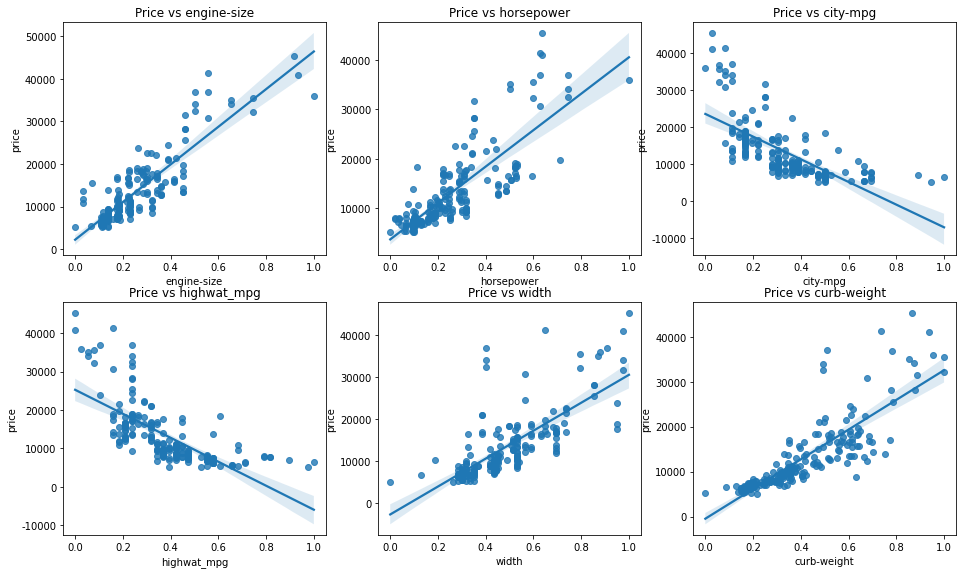

In [112]:
features = ['engine-size', 'horsepower', 'city-mpg', 'highwat_mpg', 'width','curb-weight']

#plot graphs onto a multifaced grid
plt.subplots(figsize=(16,30))
i=1
for col in features:
    plt.subplot(6,3,i)
    sns.regplot(x = col , y = 'price', data = numeric_cars)
    plt.title('Price vs '+ col)
    i+=1
    

We investigate the correlation between `price` and different features and perform the result using scatter plot with simple linear regression fit. From the figure, we can see these six selected features all have a fairly decent relationship with `price`. 

In [126]:
results = knn_train_test_kfold(features, target_col='price', df=numeric_cars, neighbors = 5, folds = 5, w='uniform')
print('RMSE calculated on each fold: ',results['rmse'], '\nAverage RMSE: ', results['rmse'].mean(), '\n')
print('R2 calculated on each fold: ',results['r2'], '\nAverage r2: ', results['r2'].mean(),'\n')

results_w = knn_train_test_kfold(features, target_col='price', df=numeric_cars, neighbors = 5, folds = 5, w='distance')
print('RMSE calculated on each fold: ',results_w['rmse'], '\nAverage RMSE: ', results_w['rmse'].mean(), '\n')
print('R2 calculated on each fold: ',results_w['r2'], '\nAverage r2: ', results_w['r2'].mean())



RMSE calculated on each fold:  [3499.94869426 3354.95007817 4135.36235704 2940.14526291 1800.03555826] 
Average RMSE:  3146.088390126237 

R2 calculated on each fold:  [0.83833188 0.84792091 0.76252896 0.78123199 0.93314386] 
Average r2:  0.8326315194500516 

RMSE calculated on each fold:  [2224.37647524 2560.24862022 3885.06147877 2547.72328859 1345.37787665] 
Average RMSE:  2512.557547893851 

R2 calculated on each fold:  [0.93469933 0.9114351  0.79040578 0.83573284 0.96265197] 
Average r2:  0.8869850024364597


We utilize six selected features to train the models with different weighting scheme. The distance weighting approach results in a significant improvement in the model by lowering the average RMSE by ~20% and increasing the average R2 value by 6%. In the following section, we plot the comparsion scattering plot for uniform weighting and distance weighting. 

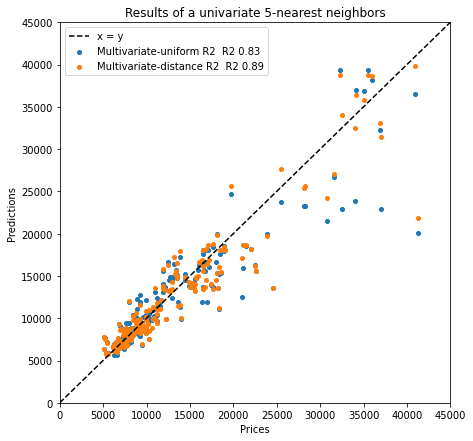

In [130]:
rp = round(r2_score(numeric_cars['price'], results['pred']),2)
rp_w = round(r2_score(numeric_cars['price'], results_w['pred']),2)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.plot([0,45000],[0,45000], linestyle='--', color='k')
ax.scatter(y = results['pred'], x = numeric_cars['price'], s = 16)
ax.scatter(y = results_w['pred'], x = numeric_cars['price'], s = 16)
ax.legend(['x = y', f'Multivariate-uniform R2  R2 {rp}', f'Multivariate-distance R2  R2 {rp_w}'])
ax.set_xlabel('Prices')
ax.set_ylabel('Predictions')
ax.set_title('Results of a univariate 5-nearest neighbors')
ax.set_xlim(left = 0, right = 45000)
ax.set_ylim(bottom = 0, top = 45000)

plt.show()

(-23000.0, 23000.0)

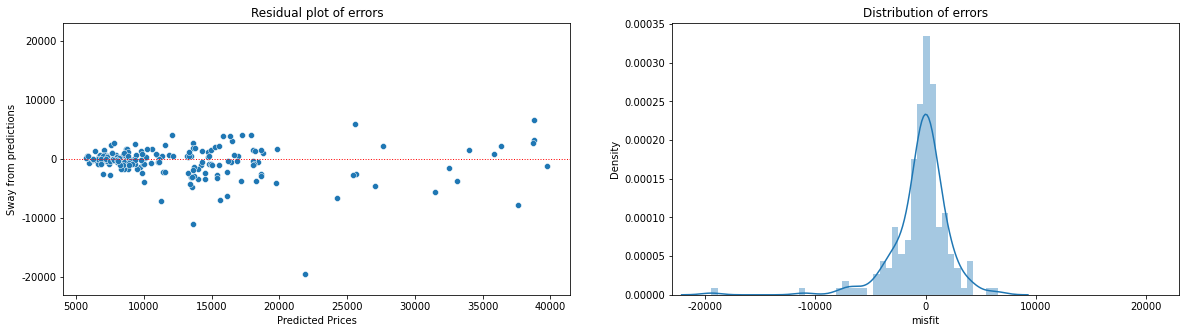

In [139]:
residuals = results_w['pred'] - numeric_cars['price']

fig, axes = plt.subplots(ncols=2, figsize=(20,5))
#prep first graph
sns.scatterplot(x = results_w['pred'], y=(residuals), ax=axes[0])

#labeling
axes[0].set_xlabel('Predicted Prices')
axes[0].set_ylabel('Sway from predictions')
axes[0].set_title('Residual plot of errors')
axes[0].axhline(linewidth=1, color='r', linestyle = 'dotted')
axes[0].set_ylim(-23000,23000)

#prep second graph
sns.distplot(results_w['pred'] - numeric_cars['price'], ax = axes[1])

axes[1].set_xlabel('misfit')
axes[1].set_title('Distribution of errors')
axes[1].set_xlim(-23000,23000)


The lower price points have a better prediction than the high endn price. It could be explained by the majority of the data point are low-price so the model can constrain better.  

## Optimizing

We already have some understanding of our data and simple models. what we can do next it to optimizing the model by testing different value for k-neighbors and the number of feature we use to train the model. 

* Constructing different combination of the feature and check how does the modeling fitting change. 
* Performing grid search for the optimal number of k neighbors. We will search from 1 to 30 and determine the best model by estimating the RMSE. 

In [141]:
best_features = data.iloc[2].sort_values()
labels = ['best_two', 'best_three', 'best_four', 'best_five']

#define a list of lists that gathers the best_n features name for each scenario
scenarios = []
for i in range(1,5):
    best_f = best_features.index[:i+1].tolist()
    scenarios.append(best_f)
scenarios
    

[['engine-size', 'horsepower'],
 ['engine-size', 'horsepower', 'curb-weight'],
 ['engine-size', 'horsepower', 'curb-weight', 'highwat_mpg'],
 ['engine-size', 'horsepower', 'curb-weight', 'highwat_mpg', 'city-mpg']]

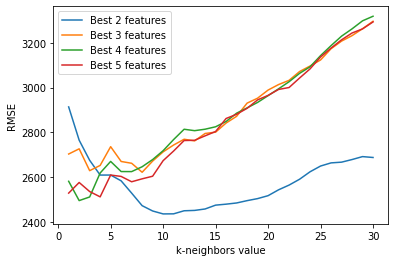

In [153]:
results = {}

for idx, scen in enumerate(scenarios):
    key = f'Best {idx+2} features'
    results[key] = {}
    for k in range(1,31): #grid search using 1-30 nearest neighbors
        model_run = knn_train_test_kfold(scen, target_col = 'price', df=numeric_cars, neighbors = k, folds = 5, w = 'distance')
        results[key][k] = model_run['rmse'].mean() 

#k are basically the labels: "best two features" etc 
#v are dictionaries with the structure {number_of_featurs: rmse}
for k,v in results.items():
    neighbors = list(v.keys()) 
    rmse = list(v.values()) 
    plt.plot(neighbors,rmse, label="{}".format(k))

plt.title('')
plt.xlabel('k-neighbors value')
plt.ylabel('RMSE')
plt.legend()

The optimal solution seem to be one that uses the best two features and 10 k-neighbors. 
Let's calculate the RMSE and the R2 value for this model.

In [152]:
results_w = knn_train_test_kfold(scenarios[0], target_col='price', df=numeric_cars, neighbors = 10, folds = 5, w='distance')
print('RMSE calculated on each fold: ',results_w['rmse'], '\nAverage RMSE: ', results_w['rmse'].mean(), '\n')
print('R2 calculated on each fold: ',results_w['r2'], '\nAverage r2: ', results_w['r2'].mean())


RMSE calculated on each fold:  [2130.70059115 3154.29598608 2519.6839829  2808.10854304 1561.90892156] 
Average RMSE:  2434.939604948682 

R2 calculated on each fold:  [0.94008358 0.86556813 0.91183917 0.80043976 0.94966263] 
Average r2:  0.8935186509895429


## Conclusions
We implement the k-nearest neighbors algorithm to predict the car prices. The dataset has an inbalance price distribution. The majority of the data point is concentrated at the low-end price where high-end price data point is far fewer. We need to aware that uneven distribution will introduce bias while build up a model. Our best model is a multivariate model using two best features, value of k neighbors equal to 10, and weighting by distance. 
### Models characteristics and results

* Considering the imbalance of the price distribution, we have performed cross validation on multiple folds to compensate for the risk of a biased dataset.
* Our best multivariate model improve the prediction by lowering the average RMSE by 22.6% and increasing the R2 value by 12.8% comparing to the first multivariate model(using 6 selected features, value of k neighbors equal to 5, and uniform weighting).

### Future plan

* collect more high-price data.
* Implement more complex model. 